Reference
- "Numerical Methods for Engineers" Steven C. Chapra, and Raymond P. Canale

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

### Problem 5.3

Determine the real root of 
$$
f(x)=-26+85x-91x^2+44x^3-8x^4+x^5
$$

(a) Graphically.

(b) Using bisection to determine the root to $\epsilon_s=10\%$. Employ initial guesses of $x_l=0.5$ and $x_u=1.0$.

(c) Perform the same computation as in (b) but use the false-position method and $\epsilon_s=0.2\%$.

In [ ]:
# [roots of equations: bracketing method]

# any euqation
# two initial guesses (opposite signs) required
# determine a single real root

In [2]:
# note
# [roots of equations: bracketing method]

# 1. determine: the value of a single real root
# 2. required: two initial guesses, bracket, (x_l, x_u) 
# could be observed from graphical method 
# f(x) is real and continuous in the interval (x_l, x_u) 
# f(x_l) and f(x_u) have opposite signs
# 3. strategy: systematically reduce the width of the bracket, to correct answer
# 4. e.g. bisection method, false-position method 
# 5. error formulation to help determine required computational effort

### Answer

1. Define functions

In [2]:
# specific for this problem
def f(x):
    
    result = -26 + 85 * x - 91 * (x ** 2) + 44 * (x ** 3) 
    - 8 * (x ** 4) + (x ** 5)
    return result

2. Graphically

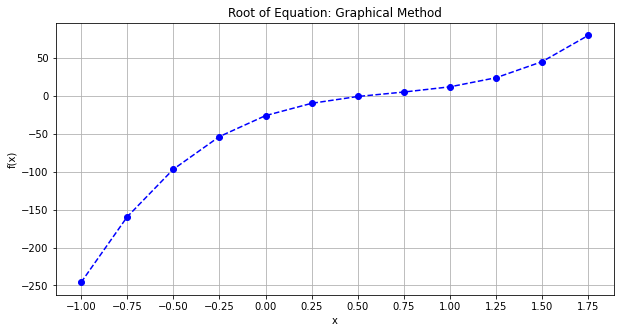

In [4]:
x = list(np.arange(-1, 2, 0.25))
y = [f(i) for i in x]

plt.figure(figsize = (10, 5))
plt.plot(x, y, 'bo--')
#plt.xlim(0, 20)
plt.xticks(x)
plt.title('Root of Equation: Graphical Method')
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.legend(loc='lower right')
plt.grid()

# insight: root around 0.5, between 0.25 and 0.75

3. Bisection method

In [5]:
def bisect(f, xl, xu, es, imax = float('inf')):
    """
    This function implements algorithm in figure 5.11, pesudocode for bisection
    sub-program which minimized function evaluations
    
    f: function of the equation
    xl: lower guess
    xu: upper guess (f(xl) and f(xu) have opposite signs)
    es: error criterion (in percent)
    imax: maximum iteration steps
    
    Returns: the approximate root 
    """
    
    i = 0
    fl = f(xl)
    ea = float('inf')
    xrold = xl   
    while True:
        i += 1
        xr = (xl + xu) / 2 # root location: bisection / middle
        fr = f(xr)
        
        test = fl * fr
        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
            fl = fr
        else:
            ea = 0
            
        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100
        print('Step: {}, xr: {}, fr: {}, ea: {}'.format(i, xr, fr, ea))
        
        if ea < es or i >= imax:
            break
        xrold = xr
    
    print('\nThe approximate root is: {}'.format(xr))
    return xr

In [6]:
bisect(f, 0.5, 1.0, 10)

Step: 1, xr: 0.75, fr: 5.125, ea: 33.33333333333333
Step: 2, xr: 0.625, fr: 2.3203125, ea: 20.0
Step: 3, xr: 0.5625, fr: 0.8505859375, ea: 11.11111111111111
Step: 4, xr: 0.53125, fr: 0.0706787109375, ea: 5.88235294117647

The approximate root is: 0.53125


0.53125

In [7]:
# using 10% error criterion, the bisection method converge in 4 iterations
# check the root
f(0.53125)

0.0706787109375

In [9]:
# add later
# python library
from scipy import optimize

optimize.bisect(f=f,
                a=0.5,
                b=1.0,
                xtol=0.05,
                full_output=True)

(0.53125,
       converged: True
            flag: 'converged'
  function_calls: 6
      iterations: 4
            root: 0.53125)

4. False-position method
- also: linear interpolation method

In [9]:
def modFalsePos(f, xl, xu, es, imax = float('inf')):
    """
    This function implements algorithm in figure 5.15, 
      pesudocode for modified false-position method
    
    f: function of the equation
    xl: lower guess
    xu: upper guess (f(xl) and f(xu) have opposite signs)
    es: error criterion (in percent)
    imax: maximum iteration steps
    
    Returns: the approximate root 
    """
    
    i = 0
    fl = f(xl)
    fu = f(xu)
    ea = float('inf')
    xrold = xl
    il, iu = 0, 0 #if one of the bounds is stuck, the function value at the stagnant bound can be divided in half
    while True:
        i += 1
        xr = xu - (fu * (xl - xu)) / (fl - fu) # root location: false position
        fr = f(xr)
        
        test = fl * fr
        if test < 0:
            xu = xr
            fu = fr
            iu = 0
            il += 1
            if il >= 2:
                fl /= 2
        elif test > 0:
            xl = xr
            fl = fr
            il = 0
            iu += 1
            if iu >= 2:
                fu /= 2
        else:
            ea = 0
            
        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100
        print('Step: {}, xr: {}, fr: {}, ea: {}'.format(i, xr, fr, ea))
        
        if ea < es or i >= imax:
            break
        xrold = xr
    
    print('\nThe approximate root is: {}'.format(xr))
    return xr

In [10]:
modFalsePos(f, 0.5, 1.0, 0.2)

Step: 1, xr: 0.5294117647058824, fr: 0.023610828414409646, ea: 5.555555555555556
Step: 2, xr: 0.5285141090574229, fr: 0.0005746591467712392, ea: 0.16984516270726843

The approximate root is: 0.5285141090574229


0.5285141090574229

In [11]:
# using 0.2% error criterion, the false_position method converge in 2 iterations
# check the root
f(0.52851410905742295)

0.0005746591467712392

5. Analyze the results

- bisection method: converges in 4 iterations using 10% error criterion
- false-position method: converges in 2 iterations using 0.2% error criterion
- efficiency: false-position method is more efficient than bisection method in this case